# Tarea N°02

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Javiera Moreno Peña

* __Rol__: 201710506-2

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [6]:
#for i in digits["target"]:
#    print(digits["target"][i])

# Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [7]:
#¿Qué tipo de datos son?
digits.dtypes

c00       int32
c01       int32
c02       int32
c03       int32
c04       int32
          ...  
c60       int32
c61       int32
c62       int32
c63       int32
target    int32
Length: 65, dtype: object

In [8]:
#¿Cuántos registros por clase hay?

digits.count()

c00       1797
c01       1797
c02       1797
c03       1797
c04       1797
          ... 
c60       1797
c61       1797
c62       1797
c63       1797
target    1797
Length: 65, dtype: int64

In [9]:
#¿Cuánta memoria estoy utilizando?
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int32
 1   c01     1797 non-null   int32
 2   c02     1797 non-null   int32
 3   c03     1797 non-null   int32
 4   c04     1797 non-null   int32
 5   c05     1797 non-null   int32
 6   c06     1797 non-null   int32
 7   c07     1797 non-null   int32
 8   c08     1797 non-null   int32
 9   c09     1797 non-null   int32
 10  c10     1797 non-null   int32
 11  c11     1797 non-null   int32
 12  c12     1797 non-null   int32
 13  c13     1797 non-null   int32
 14  c14     1797 non-null   int32
 15  c15     1797 non-null   int32
 16  c16     1797 non-null   int32
 17  c17     1797 non-null   int32
 18  c18     1797 non-null   int32
 19  c19     1797 non-null   int32
 20  c20     1797 non-null   int32
 21  c21     1797 non-null   int32
 22  c22     1797 non-null   int32
 23  c23     1797 

- Los datos de digits se distribuyen en columnas llamadas C_i con i entre 0 y 63 más una columna llamada Target. Estos datos son del tipo int32.
- memory usage: 456.4 KB.

In [10]:
#¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

#No hay registros que no corresponda a mi conocimiento previo de los datos.

In [11]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


Notamos que hay tres columnas con valores ceros en todas sus casillas (lo podemos ver en la tabla anterior ya que mean = 0): c00, c32 y c39.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [12]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
digits_dict["images"][1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

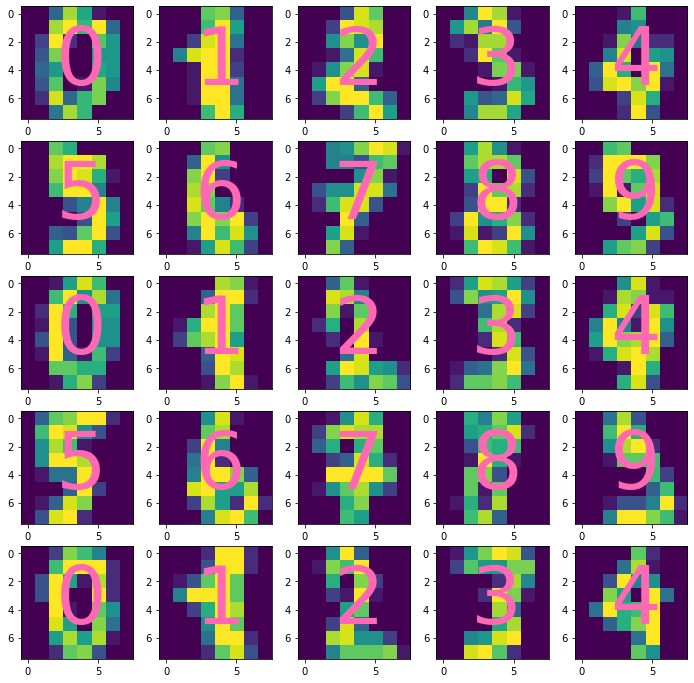

In [14]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

for i in range(0, nx):
    for j in range(0, ny):
        axs[i, j].text(2 ,5 , labels[(5*i+j) % 10], fontsize = 80, color = 'hotpink')
        axs[i, j].imshow(digits_dict["images"][5*i+j] )

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [108]:
import os
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from time import time


#Regresion Logistica
from metrics_classification import *
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression

#KNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing

#Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#Matriz de Confusion
from sklearn.metrics import confusion_matrix

import time

In [16]:
X = digits.drop(columns="target").values
Y = digits["target"].values

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

In [18]:
# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  1797
numero de filas train set     :  1437
numero de filas test set      :  360


### Regresión logística

In [20]:
# Creando el modelo
rlog = LogisticRegression()
rlog.fit(X_train, Y_train) # ajustando el modelo

C:\Users\Javiera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# metrics

from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true =  list(Y_test)
y_pred = list(rlog.predict(X_test))


print('Valores:\n')
print('originales:\n ', y_true)
print('\npredicho: \n  ', y_pred)

Valores:

originales:
  [6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3, 9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3, 6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5, 7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4, 4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2, 7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5, 7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0, 6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3, 7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6, 4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5, 2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5, 5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7, 7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5, 5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2, 4, 6, 4, 3, 4, 5, 0, 5, 2, 1, 3, 1, 4, 1, 1, 7, 0, 1, 5, 2, 1, 2, 8, 7, 

In [22]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))


Matriz de confusion:
 
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


In [23]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores:")
print("")
df_metrics


Metricas para los regresores:



,accuracy,recall,precision,fscore
0,0.9694,0.9722,0.9709,0.9714


In [24]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 

#Diccionario de Hiperparámetros
dicc_rlog = {
          'penalty' : ['l1', 'l2'],
          'C' : [100, 10 , 1, 0.1, 0.01],
          'class_weight' : ['balanced', None],
          'solver' : ['liblinear'],
          }


grid_rlog = GridSearchCV(estimator = rlog, param_grid = dicc_rlog, refit = True, n_jobs=-1) 

start_time = time.time() #Tiempo de inicio 

grid_result_rlog = grid_rlog.fit(X_train, Y_train)

print("Este modelo se ajustó en",(time.time() - start_time),"segundos.") 


Este modelo se ajustó en 19.828184604644775 segundos.


In [25]:
# print best parameter after tuning 
print("El mejor score tuvo un valor de:", grid_result_rlog.best_score_)
print("usando los siguientes parámetros:",grid_result_rlog.best_params_) 
grid_predictions = grid_result_rlog.predict(X_test) 


El mejor score tuvo un valor de: 0.9672861014324429
usando los siguientes parámetros: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}


### KNN:

In [26]:
reg_knn = neighbors.KNeighborsClassifier(5,weights='uniform')
reg_knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [27]:
# metrics

from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true =  list(Y_test)
y_pred = list(reg_knn.predict(X_test))



print('Valores:\n')
print('originales:\n ', y_true)
print('\npredicho: \n  ', y_pred)

Valores:

originales:
  [6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3, 9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3, 6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5, 7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4, 4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2, 7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5, 7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0, 6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3, 7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6, 4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5, 2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5, 5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7, 7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5, 5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2, 4, 6, 4, 3, 4, 5, 0, 5, 2, 1, 3, 1, 4, 1, 1, 7, 0, 1, 5, 2, 1, 2, 8, 7, 

In [28]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores:")
print("")
df_metrics


Metricas para los regresores:



,accuracy,recall,precision,fscore
0,0.9861,0.9878,0.9879,0.9878


In [29]:
#Diccionario de Hiperparámetros
dicc_knn = {
          'n_neighbors' : [3, 6, 15,30],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'minkowski'],
          'algorithm' : ['auto','brute', 'kd_tree']
          }


grid_knn = GridSearchCV(estimator = reg_knn, param_grid = dicc_knn, cv = 10) 

start_time = time.time() #Tiempo de inicio 

grid_result_knn = grid_knn.fit(X_train, Y_train)

print("Este modelo se ajustó en",(time.time() - start_time),"segundos.") 

Este modelo se ajustó en 12.135024070739746 segundos.


In [30]:
# print best parameter after tuning 
print("El mejor score tuvo un valor de:", grid_result_knn.best_score_)
print("usando los siguientes parámetros:",grid_result_knn.best_params_) 
grid_predictions = grid_result_knn.predict(X_test) 

El mejor score tuvo un valor de: 0.9874757187257188
usando los siguientes parámetros: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


### Decision Tree:

In [31]:
reg_tree = tree.DecisionTreeClassifier(max_depth=5)
reg_tree.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=5)

In [32]:
# metrics

from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true =  list(Y_test)
y_pred = list(reg_tree.predict(X_test))



print('Valores:\n')
print('originales:\n ', y_true)
print('\npredicho: \n  ', y_pred)

Valores:

originales:
  [6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3, 9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3, 6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5, 7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4, 4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2, 7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5, 7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0, 6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3, 7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6, 4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5, 2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5, 5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7, 7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5, 5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2, 4, 6, 4, 3, 4, 5, 0, 5, 2, 1, 3, 1, 4, 1, 1, 7, 0, 1, 5, 2, 1, 2, 8, 7, 

In [33]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores:")
print("")
df_metrics


Metricas para los regresores:



,accuracy,recall,precision,fscore
0,0.675,0.6568,0.7325,0.6509


In [34]:
#Diccionario de Hiperparámetros
dicc_tree = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth': [6,10,15,20,30]
    }

#grid_rlog = GridSearchCV(estimator = rlog, param_grid = dicc, refit = True, cv = 10)
grid_tree = GridSearchCV(estimator = reg_tree, param_grid = dicc_tree, cv = 10) 

start_time = time.time() #Tiempo de inicio 

grid_result_tree = grid_tree.fit(X_train, Y_train)

print("Este modelo se ajustó en",(time.time() - start_time),"segundos.") 

Este modelo se ajustó en 2.4788401126861572 segundos.


In [35]:
# print best parameter after tuning 
print("El mejor score tuvo un valor de:", grid_result_tree.best_score_)
print("usando los siguientes parámetros:",grid_result_tree.best_params_) 
grid_predictions = grid_result_tree.predict(X_test) 

El mejor score tuvo un valor de: 0.8142385392385393
usando los siguientes parámetros: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'splitter': 'best'}


- ¿Cuál modelo es mejor basado en sus métricas?: el mejor modelo según las métrias es el modelo de K-Nearest Neighbors.
- ¿Cuál modelo demora menos tiempo en ajustarse?: el modelo que demora menos tiempo en ajustarse es el Decission Tree Classifier con 2.4 segundos aproximadamente.
- ¿Qué modelo escoges?: escojo el modelo de K-Nearest Neighbors porque tiene las mejores métricas y aunque su tiempo de ejecución fue de alrededor 11 segundos creo que no es tampoco un tiempo de ejecución tan elevado.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [36]:
#Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = reg_knn,
                            X = X_train,
                            y = Y_train,
                            cv = 10)


print("La precisión es de: %0.2f ± %0.2f" % (scores.mean(), scores.std() * 2))

La precisión es de: 0.99 ± 0.02


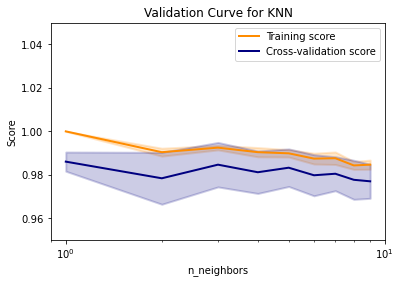

In [37]:
#Curva de Validación:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

#X, y = load_digits(return_X_y=True)

param_range = np.array([i for i in range (1,10)])
train_scores, test_scores = validation_curve(
    #KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean', weights = 'distance'),
    KNeighborsClassifier(5,weights='uniform'),
    X_train,
    Y_train,
    param_name="n_neighbors",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve for KNN")
plt.xlabel("n_neighbors")
plt.ylabel("Score")

plt.ylim(0.95, 1.05)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

In [38]:
#Curva AUC-ROC

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# Binarize the output
y = label_binarize(Y, classes=digits["target"].unique())
n_classes = y.shape[1]

n_samples, n_features = X.shape

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    train_size = 0.7)
                                                    

# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifier())
y_score = classifier.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-39-f87f6eed5040>:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


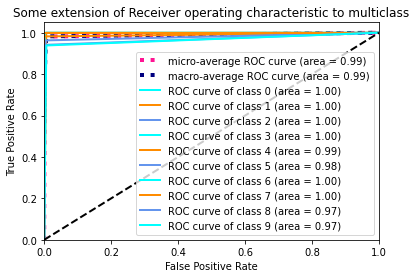

In [39]:
#Plot ROC curves for the multiclass problem
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

### Selección de atributos:

In [41]:
# Separamos las columnas objetivo
#x_training = digits.drop(columns = "target")
x_training = digits.drop(['c00','c32','c39',"target"], axis = 1)
y_training = digits["target"]

# Aplicando el algoritmo univariante de prueba F.
k = 20  # número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)

catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
atributos #printea la selección de atributos con la cual trabajaremos.

['c02',
 'c10',
 'c13',
 'c20',
 'c21',
 'c26',
 'c28',
 'c30',
 'c33',
 'c34',
 'c36',
 'c38',
 'c42',
 'c43',
 'c44',
 'c46',
 'c54',
 'c58',
 'c60',
 'c61']

### Extracción de atributos: PCA

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [43]:
X2 = StandardScaler().fit_transform(X_train) #reescala los datos
#ajuste del modelo
embedding = PCA(n_components=64)
X_transform = embedding.fit_transform(X)
    

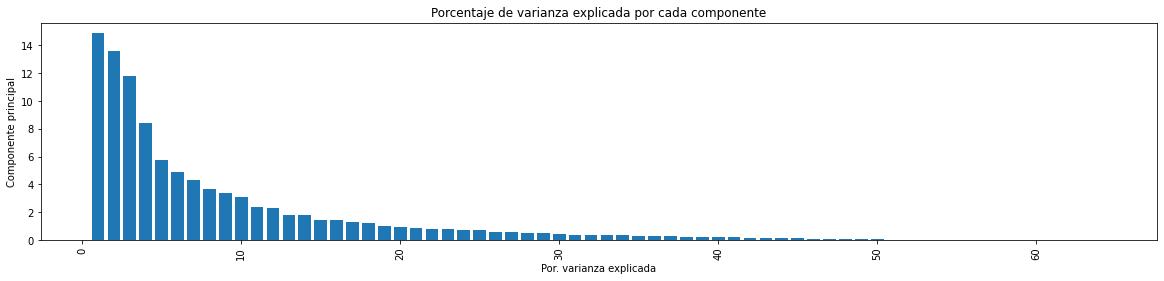

In [79]:
# graficar varianza por componente
percent_variance = embedding.explained_variance_ratio_* 100

    
plt.figure(figsize=(20,4))
plt.bar(x= range(1,65), height=percent_variance)
plt.xticks(rotation=90)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

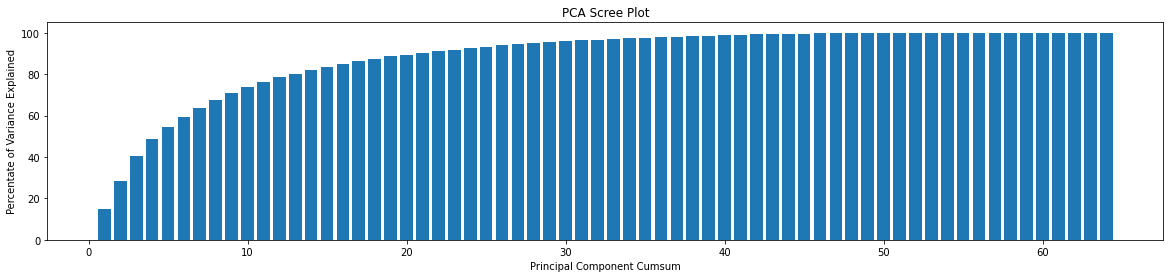

In [91]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)


plt.figure(figsize=(20,4))
plt.bar(x= range(1,65), height=percent_variance_cum)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from metrics_classification import summary_metrics


In [48]:
import time

start_time = time.time()
# Entrenamiento con todas las variables 
X = digits.drop(columns = "target")
Y = digits["target"]

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) 

# Creando el modelo
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train) # ajustando el modelo

predicciones = knn.predict(X_test)


time = time.time() - start_time
print("El tiempo de ejecución es;", time)

df_pred = pd.DataFrame({
    'y':Y_test,
    'yhat':predicciones
})

df_s1 = summary_metrics(df_pred).assign(name = 'Todas las variables')


El tiempo de ejecución es; 0.072174072265625


In [49]:
import time

start_time = time.time()
# Entrenamiento con las variables seleccionadas
X = digits[atributos]
Y = digits['target']



# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) 

# Creando el modelo
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train) # ajustando el modelo

predicciones = knn.predict(X_test)

time = time.time() - start_time
print("El tiempo de ejecución es:", time)

df_pred = pd.DataFrame({
    'y':Y_test,
    'yhat':predicciones
})

df_s2 = summary_metrics(df_pred).assign(name = 'Variables Seleccionadas')


El tiempo de ejecución es: 0.09474968910217285


In [50]:
# juntar resultados en formato dataframe
pd.concat([df_s1,df_s2])

,accuracy,recall,precision,fscore,name
0,0.9806,0.9787,0.9831,0.9805,Todas las variables
0,0.9389,0.9371,0.9400,0.9375,Variables Seleccionadas


Notamos que el tiempo de ejecución es menor para el modelo con menos variables. También las métricas para el modelo con variables seleccionadas es un poco mejor que el modelo con todas las variables.

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [94]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == Y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != Y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    #y_aux_true = Y_test[mask]
    #y_aux_pred = y_pred[mask]
        

    y_aux_true = np.array(Y_test)[mask]
  
    y_aux_pred = np.array(y_pred)[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

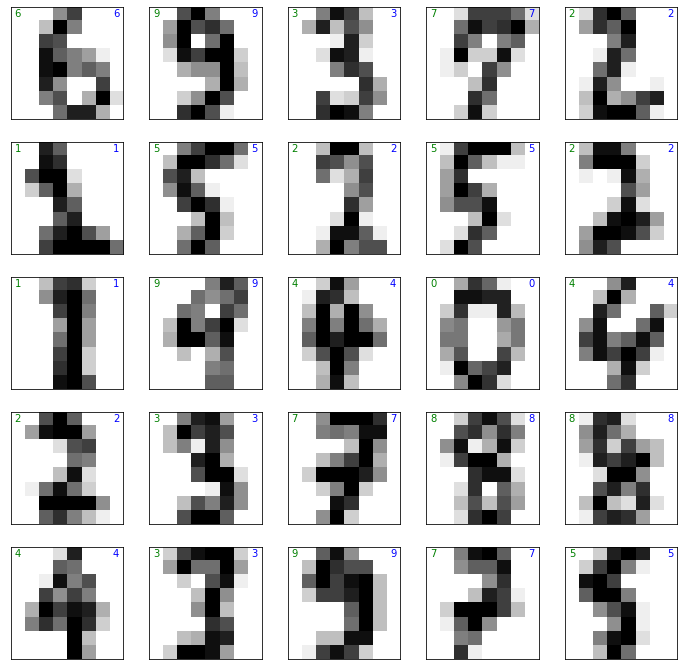

In [95]:
mostar_resultados(digits,KNeighborsClassifier(),nx=5, ny=5,label = "correctos")

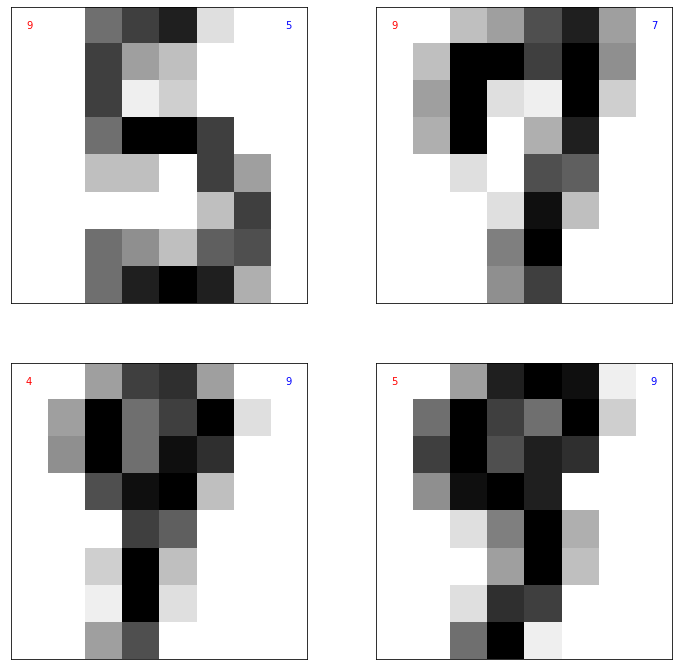

In [98]:
mostar_resultados(digits,KNeighborsClassifier(),nx=2, ny=2,label = "incorrectos")

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Las principales dificultades que encontré fueron que no entendía lo que se pedía y, por ejemplo, la función dada en el ejercicio 6 estaba mal escrita y me demoré mucho en entender qué estaba mal para que funcionase. Creo también que la parte de Machine Learning se dictó muy rápido por parte del profesor por lo que me costó aún más desarrollar los ejercicios porque constantemente debía volver a la documentación de la clase o ir a google para entender qué debía hacer.

## II.- California Housing Prices


<img src="https://www.wartsila.com/images/default-source/default-album/california_housing.tmb-1920x690.jpg?sfvrsn=126bc44_1" width="480" height="240" align="center"/>

Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad. 
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo 
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: Puede tomar como referencia lo realizado en la sección **I.- Clasificación de dígitos**. El alumno tiene la libertad de desarrollar un análisis más completo del problema (si así lo desea). Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [54]:
# read data
housing = pd.read_csv('data/housing.csv',sep=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [55]:
print("Shape:", housing.shape)
print("Types:\n", housing.dtypes)


Shape: (20640, 10)
Types:
 longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [56]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [57]:
print(housing.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Notamos que en total_bedroom hay 207 valores nulos que reemplazaremos con el promedio de total_bedrooms:

In [58]:
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean())

<AxesSubplot:>

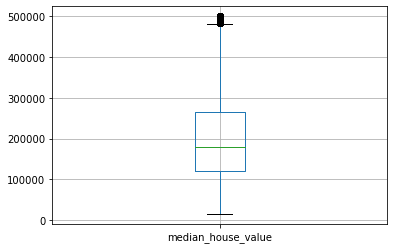

In [59]:
housing.boxplot(column=['median_house_value'])

In [60]:
housing['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

Se puede inferir que el valor max: 500001.000000  posiblemente es un outlier (se aleja mucho de los otros valores). Contemos cuántos valores hay con ese número y su porcentaje con respecto al total de los valores (que son 20640).

In [61]:
housing[housing['median_house_value'] == 500001]['median_house_value'].count()

965

In [62]:
print((965/ 20640)*100)

4.675387596899225


Los outliers representan al rededor del 4.7% de los datos totales. Decidiremos no quitarlos porque es un bajo porcentaje.

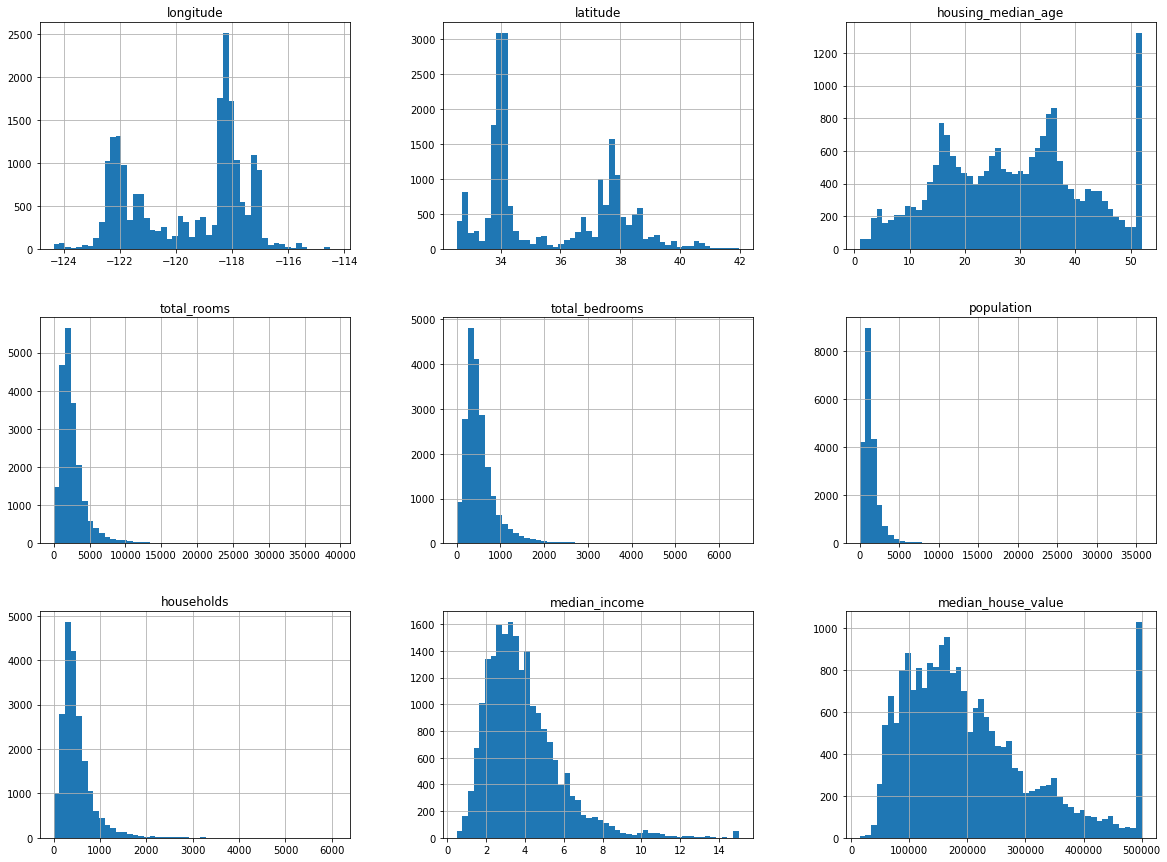

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

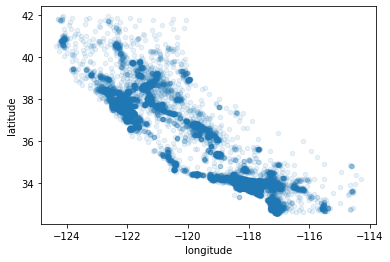

In [64]:
housing.plot(kind="scatter",x="longitude",y="latitude", alpha = 0.1)

In [66]:
X = housing.drop(columns=["median_house_value","ocean_proximity"]).values
Y = housing["median_house_value"].values

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

In [68]:
# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  20640
numero de filas train set     :  16512
numero de filas test set      :  4128


Logistic Regression:

In [69]:
# Creando el modelo
rlog = LogisticRegression()
rlog.fit(X_train, Y_train) # ajustando el modelo

C:\Users\Javiera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
# metrics

from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true =  list(Y_test)
y_pred = list(rlog.predict(X_test))


print('Valores:\n')
print('originales:\n ', y_true)
print('\npredicho: \n  ', y_pred)

Valores:

originales:
  [47700.0, 45800.0, 500001.0, 218600.0, 278000.0, 158700.0, 198200.0, 157500.0, 340000.0, 446600.0, 123200.0, 253900.0, 215100.0, 220500.0, 219800.0, 136200.0, 178400.0, 187500.0, 139800.0, 137500.0, 425000.0, 405600.0, 138800.0, 500001.0, 162100.0, 51400.0, 151300.0, 94800.0, 204100.0, 361500.0, 85100.0, 138400.0, 137500.0, 465000.0, 271800.0, 239400.0, 340900.0, 150400.0, 128100.0, 156000.0, 258100.0, 90500.0, 71300.0, 219700.0, 151000.0, 290100.0, 142000.0, 291500.0, 255400.0, 98100.0, 251900.0, 162100.0, 129400.0, 89400.0, 150500.0, 133800.0, 80400.0, 211100.0, 255600.0, 214500.0, 500001.0, 202100.0, 81500.0, 98800.0, 281900.0, 184600.0, 254700.0, 143100.0, 162500.0, 142600.0, 85900.0, 186900.0, 71300.0, 174400.0, 225000.0, 146500.0, 405000.0, 189600.0, 164400.0, 337500.0, 72500.0, 143800.0, 160000.0, 118100.0, 374000.0, 202700.0, 96600.0, 65800.0, 167400.0, 179800.0, 96700.0, 266100.0, 91100.0, 49800.0, 90700.0, 115800.0, 278600.0, 250000.0, 85000.0, 177000.

In [71]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))


Matriz de confusion:
 
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   1]
 ...
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   5]
 [  0   0   0 ...   0   0 164]]


In [72]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores:")
print("")
df_metrics


Metricas para los regresores:



C:\Users\Javiera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Javiera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,recall,precision,fscore
0,0.0431,0.0006,0.0001,0.0001


In [107]:
#NO PUDE HACER CORRER EL SIGUIENTE CÓDIGO: estuvo media hora ejecutándose y nada, nunca se ejecutó.

"""#Diccionario de Hiperparámetros
dicc_rlog = {
          'penalty' : ['l1', 'l2'],
          'C' : [100, 10 , 1, 0.1, 0.01],
          'class_weight' : ['balanced', None],
          'solver' : ['liblinear'],
          }


grid_rlog = GridSearchCV(estimator = rlog, param_grid = dicc_rlog, refit = True, n_jobs=-1) 

start_time = time.time() #Tiempo de inicio 

grid_result_rlog = grid_rlog.fit(X_train, Y_train)

print("Este modelo se ajustó en",(time.time() - start_time),"segundos.") 
"""



'#Diccionario de Hiperparámetros\ndicc_rlog = {\n          \'penalty\' : [\'l1\', \'l2\'],\n          \'C\' : [100, 10 , 1, 0.1, 0.01],\n          \'class_weight\' : [\'balanced\', None],\n          \'solver\' : [\'liblinear\'],\n          }\n\n\ngrid_rlog = GridSearchCV(estimator = rlog, param_grid = dicc_rlog, refit = True, n_jobs=-1) \n\nstart_time = time.time() #Tiempo de inicio \n\ngrid_result_rlog = grid_rlog.fit(X_train, Y_train)\n\nprint("Este modelo se ajustó en",(time.time() - start_time),"segundos.") \n'

In [ ]:
"""# print best parameter after tuning 
print("El mejor score tuvo un valor de:", grid_result_rlog.best_score_)
print("usando los siguientes parámetros:",grid_result_rlog.best_params_) 
grid_predictions = grid_result_rlog.predict(X_test) 
"""

K-Neighbors Classifier:

In [73]:
reg_knn = neighbors.KNeighborsClassifier(5,weights='uniform')
reg_knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [74]:
# metrics

from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true =  list(Y_test)
y_pred = list(reg_knn.predict(X_test))



print('Valores:\n')
print('originales:\n ', y_true)
print('\npredicho: \n  ', y_pred)

Valores:

originales:
  [47700.0, 45800.0, 500001.0, 218600.0, 278000.0, 158700.0, 198200.0, 157500.0, 340000.0, 446600.0, 123200.0, 253900.0, 215100.0, 220500.0, 219800.0, 136200.0, 178400.0, 187500.0, 139800.0, 137500.0, 425000.0, 405600.0, 138800.0, 500001.0, 162100.0, 51400.0, 151300.0, 94800.0, 204100.0, 361500.0, 85100.0, 138400.0, 137500.0, 465000.0, 271800.0, 239400.0, 340900.0, 150400.0, 128100.0, 156000.0, 258100.0, 90500.0, 71300.0, 219700.0, 151000.0, 290100.0, 142000.0, 291500.0, 255400.0, 98100.0, 251900.0, 162100.0, 129400.0, 89400.0, 150500.0, 133800.0, 80400.0, 211100.0, 255600.0, 214500.0, 500001.0, 202100.0, 81500.0, 98800.0, 281900.0, 184600.0, 254700.0, 143100.0, 162500.0, 142600.0, 85900.0, 186900.0, 71300.0, 174400.0, 225000.0, 146500.0, 405000.0, 189600.0, 164400.0, 337500.0, 72500.0, 143800.0, 160000.0, 118100.0, 374000.0, 202700.0, 96600.0, 65800.0, 167400.0, 179800.0, 96700.0, 266100.0, 91100.0, 49800.0, 90700.0, 115800.0, 278600.0, 250000.0, 85000.0, 177000.

In [121]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))


Matriz de confusion:
 
[[  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   5]
 [  0   0   0 ...   0   0 175]]


In [75]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores:")
print("")
df_metrics


Metricas para los regresores:



C:\Users\Javiera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Javiera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,recall,precision,fscore
0,0.0187,0.0003,0.0006,0.0003


In [106]:
import time

#Diccionario de Hiperparámetros
dicc_knn = {
          'n_neighbors' : [3, 6, 15,30],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'minkowski'],
          'algorithm' : ['auto','brute', 'kd_tree']
          }


grid_knn = GridSearchCV(estimator = reg_knn, param_grid = dicc_knn, cv = 10) 

start_time = time.time() #Tiempo de inicio 

grid_result_knn = grid_knn.fit(X_train, Y_train)

print("Este modelo se ajustó en",(time.time() - start_time),"segundos.") 

C:\Users\Javiera\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Este modelo se ajustó en 241.00857877731323 segundos.


In [109]:
# print best parameter after tuning 
print("El mejor score tuvo un valor de:", grid_result_knn.best_score_)
print("usando los siguientes parámetros:",grid_result_knn.best_params_) 
grid_predictions = grid_result_knn.predict(X_test) 

El mejor score tuvo un valor de: 0.04045541406411553
usando los siguientes parámetros: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'uniform'}


Decision Tree

In [110]:
reg_tree = tree.DecisionTreeClassifier(max_depth=5)
reg_tree.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=5)

In [111]:
# metrics

from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true =  list(Y_test)
y_pred = list(reg_tree.predict(X_test))



print('Valores:\n')
print('originales:\n ', y_true)
print('\npredicho: \n  ', y_pred)

Valores:

originales:
  [47700.0, 45800.0, 500001.0, 218600.0, 278000.0, 158700.0, 198200.0, 157500.0, 340000.0, 446600.0, 123200.0, 253900.0, 215100.0, 220500.0, 219800.0, 136200.0, 178400.0, 187500.0, 139800.0, 137500.0, 425000.0, 405600.0, 138800.0, 500001.0, 162100.0, 51400.0, 151300.0, 94800.0, 204100.0, 361500.0, 85100.0, 138400.0, 137500.0, 465000.0, 271800.0, 239400.0, 340900.0, 150400.0, 128100.0, 156000.0, 258100.0, 90500.0, 71300.0, 219700.0, 151000.0, 290100.0, 142000.0, 291500.0, 255400.0, 98100.0, 251900.0, 162100.0, 129400.0, 89400.0, 150500.0, 133800.0, 80400.0, 211100.0, 255600.0, 214500.0, 500001.0, 202100.0, 81500.0, 98800.0, 281900.0, 184600.0, 254700.0, 143100.0, 162500.0, 142600.0, 85900.0, 186900.0, 71300.0, 174400.0, 225000.0, 146500.0, 405000.0, 189600.0, 164400.0, 337500.0, 72500.0, 143800.0, 160000.0, 118100.0, 374000.0, 202700.0, 96600.0, 65800.0, 167400.0, 179800.0, 96700.0, 266100.0, 91100.0, 49800.0, 90700.0, 115800.0, 278600.0, 250000.0, 85000.0, 177000.

In [120]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))


Matriz de confusion:
 
[[  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   5]
 [  0   0   0 ...   0   0 175]]


In [112]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores:")
print("")
df_metrics


Metricas para los regresores:



C:\Users\Javiera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Javiera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,recall,precision,fscore
0,0.0429,0.0006,0.0,0.0001


In [115]:

#NO PUDE HACER CORRER EL SIGUIENTE CÓDIGO TAMPOCO (se tarda demasiado):

"""import time
#Diccionario de Hiperparámetros
dicc_tree = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth': [6,10,15,20,30]
    }

#grid_rlog = GridSearchCV(estimator = rlog, param_grid = dicc, refit = True, cv = 10)
grid_tree = GridSearchCV(estimator = reg_tree, param_grid = dicc_tree, cv = 10) 

start_time = time.time() #Tiempo de inicio 

grid_result_tree = grid_tree.fit(X_train, Y_train)

print("Este modelo se ajustó en",(time.time() - start_time),"segundos.") """

'import time\n#Diccionario de Hiperparámetros\ndicc_tree = {\n    \'criterion\' : [\'gini\', \'entropy\'],\n    \'splitter\' : [\'best\', \'random\'],\n    \'max_features\' : [\'auto\', \'sqrt\', \'log2\'],\n    \'max_depth\': [6,10,15,20,30]\n    }\n\n#grid_rlog = GridSearchCV(estimator = rlog, param_grid = dicc, refit = True, cv = 10)\ngrid_tree = GridSearchCV(estimator = reg_tree, param_grid = dicc_tree, cv = 10) \n\nstart_time = time.time() #Tiempo de inicio \n\ngrid_result_tree = grid_tree.fit(X_train, Y_train)\n\nprint("Este modelo se ajustó en",(time.time() - start_time),"segundos.") '

In [116]:
"""# print best parameter after tuning 
print("El mejor score tuvo un valor de:", grid_result_tree.best_score_)
print("usando los siguientes parámetros:",grid_result_tree.best_params_) 
grid_predictions = grid_result_tree.predict(X_test) """

'# print best parameter after tuning \nprint("El mejor score tuvo un valor de:", grid_result_tree.best_score_)\nprint("usando los siguientes parámetros:",grid_result_tree.best_params_) \ngrid_predictions = grid_result_tree.predict(X_test) '

Random Forest Classifier:

In [123]:
random_forest = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

In [124]:
# metrics

y_true =  list(Y_test)
y_pred = list(random_forest.predict(X_test))



print('Valores:\n')
print('originales:\n ', y_true)
print('\npredicho: \n  ', y_pred)

Valores:

originales:
  [47700.0, 45800.0, 500001.0, 218600.0, 278000.0, 158700.0, 198200.0, 157500.0, 340000.0, 446600.0, 123200.0, 253900.0, 215100.0, 220500.0, 219800.0, 136200.0, 178400.0, 187500.0, 139800.0, 137500.0, 425000.0, 405600.0, 138800.0, 500001.0, 162100.0, 51400.0, 151300.0, 94800.0, 204100.0, 361500.0, 85100.0, 138400.0, 137500.0, 465000.0, 271800.0, 239400.0, 340900.0, 150400.0, 128100.0, 156000.0, 258100.0, 90500.0, 71300.0, 219700.0, 151000.0, 290100.0, 142000.0, 291500.0, 255400.0, 98100.0, 251900.0, 162100.0, 129400.0, 89400.0, 150500.0, 133800.0, 80400.0, 211100.0, 255600.0, 214500.0, 500001.0, 202100.0, 81500.0, 98800.0, 281900.0, 184600.0, 254700.0, 143100.0, 162500.0, 142600.0, 85900.0, 186900.0, 71300.0, 174400.0, 225000.0, 146500.0, 405000.0, 189600.0, 164400.0, 337500.0, 72500.0, 143800.0, 160000.0, 118100.0, 374000.0, 202700.0, 96600.0, 65800.0, 167400.0, 179800.0, 96700.0, 266100.0, 91100.0, 49800.0, 90700.0, 115800.0, 278600.0, 250000.0, 85000.0, 177000.

In [119]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))


Matriz de confusion:
 
[[  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   5]
 [  0   0   0 ...   0   0 175]]


In [125]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores:")
print("")
df_metrics


Metricas para los regresores:



C:\Users\Javiera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Javiera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,recall,precision,fscore
0,0.0436,0.0005,0.0002,0.0001


Conclusiones: por alguna razón que no comprendo, las métricas que dan son muy malas por lo que me cuesta concluir algo. 